### Load the RGB mapping data and do modifications

##### note : i need to check again the munsell even thouh is 100%

In [1]:
import pandas as pd

# Load the RGB mapping data
munsell_rgb_df  = pd.read_csv('munsell-rgb.csv')
munsell_rgb_df .drop(columns=['Unnamed: 4'], inplace=True)  # Drop any unnecessary columns

# Clean data
munsell_rgb_df .columns = munsell_rgb_df .columns.str.strip()
munsell_rgb_df ['Munsell'] = munsell_rgb_df ['Munsell'].str.strip()

munsell_rgb_df .head()

,Munsell,R,G,B
0,5R 4/14,229,0,13
1,5YR 6.5/15,255,127,0
2,5Y 8/15,255,242,0
3,5GY 7/12,140,201,25
4,5G 5/11,17,147,82


### Load the emotions data 
#### Clean any whitespace from my data which can cause mismatches in the merging process.
- ##### note : i need to add the emotional words that are missing from the book 
- ##### note : i need to check what i will do for the values like this in some emotional words eg. Precious B103 P119 126 127 
- ##### note : i need to check if i will keep values after the first 3 or not

In [2]:
import pandas as pd
import numpy as np  # Import numpy for NaN handling

# Load the Emotions and Munsell codes CSV
emotions_munsell_df = pd.read_csv('emotions-munsell.csv')

# Replace empty strings with NaN for uniformity
# This handles purely white space entries as well
emotions_munsell_df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

# Ensure column names are clean and without any trailing spaces
emotions_munsell_df.columns = emotions_munsell_df.columns.str.strip()

# Display the first few rows to confirm correct loading and cleaning
print(emotions_munsell_df.head(5))  # Displaying first 5 to see the initial data

          Emotional_Word Munsell_Code_1 Munsell_Code_2 Munsell_Code_3  \
Cute              5R 8/6         5Y 9/6       5GY 8/11         5G 8/6   
Childlike        5R 7/10         5Y 9/6         5B 8/5       5RP 7/10   
Pretty            5R 8/6        5Y 8/11        5BG 7/9       5RP 7/10   
sweet            5R 7/10        5YR 9/4        5RP 8/6            NaN   
Amusing          5YR 8/7       5GY 7/12      5BG 6.5/6        5P 4/12   

          Munsell_Code_4 Munsell_Code_5 Munsell_Code_6 Munsell_Code_7  \
Cute              5B 8/5       5RP 7/10            NaN            NaN   
Childlike            NaN            NaN            NaN            NaN   
Pretty               NaN            NaN            NaN            NaN   
sweet                NaN            NaN            NaN            NaN   
Amusing         5RP 4/10            NaN            NaN            NaN   

          Munsell_Code_8 Munsell_Code_9  
Cute                 NaN            NaN  
Childlike            NaN            Na

### Load the csv file emotions-rgb.csv 
#### This is the most important file which having for each emotional word the corrersponding rgb values

### Step 1: Data Preparation

In [3]:
import pandas as pd

df = pd.read_csv('emotions-rgb.csv')

df.head()

,Emotional_Word,RGB_1,RGB_2,RGB_3,RGB_4,RGB_5,RGB_6,RGB_7,RGB_8,RGB_9
0,Cute,"[251, 167, 157]","[255, 242, 124]","[179, 22, 61]","[145, 209, 127]","[153, 216, 212]","[248, 117, 157]",NaN,NaN,NaN
1,Childlike,"[251, 103, 89]","[255, 242, 124]","[153, 216, 212]","[248, 117, 157]",NaN,NaN,NaN,NaN,NaN
2,Pretty,"[251, 167, 157]","[255, 242, 63]","[78, 181, 135]","[248, 117, 157]",NaN,NaN,NaN,NaN,NaN
3,Sweet,"[251, 103, 89]","[253, 192, 145]","[251, 174, 193]",NaN,NaN,NaN,NaN,NaN,NaN
4,Amusing,"[253, 166, 74]","[140, 201, 25]","[90, 177, 132]","[95, 35, 141]","[187, 45, 105]",NaN,NaN,NaN,NaN


- #### Handle NaN values for the first 3 Columns RGB_1 - RGB_3 ( we delete the emotional_words who haven't at least 3 rgb values)

In [11]:
import pandas as pd

df = pd.read_csv('emotions-RGB1-3.csv')

emotions_to_drop = ['Proper', 'Aristocratic','Formal','Cultivated', 'Delicious', 'Happy', 'Active', 'Fiery', 'Forceful', 'Hot', 'Aromatic', 'Dapper', 'Precious', 'Light', 'Neat', 'Cultivated']
df = df[~df['Emotional_Word'].isin(emotions_to_drop)]

df.head()


,Emotional_Word,RGB_1,RGB_2,RGB_3
0,Cute,"[251, 167, 157]","[255, 242, 124]","[179, 22, 61]"
1,Childlike,"[251, 103, 89]","[255, 242, 124]","[153, 216, 212]"
2,Pretty,"[251, 167, 157]","[255, 242, 63]","[78, 181, 135]"
3,Sweet,"[251, 103, 89]","[253, 192, 145]","[251, 174, 193]"
4,Amusing,"[253, 166, 74]","[140, 201, 25]","[90, 177, 132]"


- #### Normalisation the csv file from RGB_1 to RGB_3

In [5]:
import numpy as np

# Function to normalize RGB values
def normalize_rgb(rgb_values):
    if pd.isna(rgb_values):
        return np.nan
    # Convert string to list of integers
    rgb_values = list(map(int, rgb_values.strip('[]').split(',')))
    # Normalize to 0-1 range
    return [value / 255.0 for value in rgb_values]

# Apply normalization to each RGB column
for i in range(1, 4):
    df[f'RGB_{i}'] = df[f'RGB_{i}'].apply(normalize_rgb)

df.head()


,Emotional_Word,RGB_1,RGB_2,RGB_3
0,Cute,"[0.984313725490196, 0.6549019607843137, 0.6156...","[1.0, 0.9490196078431372, 0.48627450980392156]","[0.7019607843137254, 0.08627450980392157, 0.23..."
1,Childlike,"[0.984313725490196, 0.403921568627451, 0.34901...","[1.0, 0.9490196078431372, 0.48627450980392156]","[0.6, 0.8470588235294118, 0.8313725490196079]"
2,Pretty,"[0.984313725490196, 0.6549019607843137, 0.6156...","[1.0, 0.9490196078431372, 0.24705882352941178]","[0.3058823529411765, 0.7098039215686275, 0.529..."
3,Sweet,"[0.984313725490196, 0.403921568627451, 0.34901...","[0.9921568627450981, 0.7529411764705882, 0.568...","[0.984313725490196, 0.6823529411764706, 0.7568..."
4,Amusing,"[0.9921568627450981, 0.6509803921568628, 0.290...","[0.5490196078431373, 0.788235294117647, 0.0980...","[0.35294117647058826, 0.6941176470588235, 0.51..."


- #### Convert RGB to CIELAB:
    ##### Since the CIELAB color space is more perceptually uniform than RGB, convert the RGB values to LAB. This will help in calculating the dimensions based on human color perception.

In [6]:
from skimage.color import rgb2lab

# Function to convert normalized RGB to CIELAB
def rgb_to_lab(rgb_values):
    try:
        if isinstance(rgb_values, float) and np.isnan(rgb_values):
            return np.nan
        return rgb2lab(np.array(rgb_values).reshape(1, 1, 3)).flatten()
    except Exception as e:
        print(f"Error converting RGB to LAB: {rgb_values} - {e}")
        return np.nan

# Apply the function to each normalized RGB column
for i in range(1, 4):  # Adjust range if you have more columns
    df[f'LAB_{i}'] = df[f'RGB_{i}'].apply(rgb_to_lab)

# Keep only the updated columns
df_lab = df[['Emotional_Word'] + [f'LAB_{i}' for i in range(1, 4)]]

# Display the updated DataFrame
df_lab.head()


,Emotional_Word,LAB_1,LAB_2,LAB_3
0,Cute,"[76.42708741455279, 29.785244147259192, 17.919...","[94.4073688705667, -10.528222756688077, 57.845...","[38.72085486566542, 60.14318711212716, 20.8589..."
1,Childlike,"[62.454407579709695, 55.64879484662655, 36.848...","[94.4073688705667, -10.528222756688077, 57.845...","[82.18211829411095, -20.72742506314096, -4.446..."
2,Pretty,"[76.42708741455279, 29.785244147259192, 17.919...","[93.93761507218909, -14.116700596014331, 81.34...","[66.83554619711273, -40.859941441195424, 14.61..."
3,Sweet,"[62.454407579709695, 55.64879484662655, 36.848...","[82.1795619701423, 16.12866383445388, 32.15724...","[78.83061104976815, 30.734214139191863, 1.7640..."
4,Amusing,"[75.23602389004749, 24.365586038199773, 58.944...","[74.4566186402672, -42.50826053071649, 70.8442...","[65.9677367199096, -36.835559717039054, 15.111..."


### Step 2: Define Emotional Dimensions

- ##### Warm/Cool: Utilize the 'a' channel from LAB (positive values are warm, negative are cool).
- ##### Soft/Hard: Combine 'b' channel and lightness. High saturation and low lightness can be considered hard, while low saturation and high lightness can be considered soft.
- ##### Grayish/Clear: Use saturation (low saturation for grayish and high for clear).

##### Apply Transformations: Apply these functions across the LAB data to create new columns in our DataFrame representing each of these dimensions for every RGB column.

- #### Calculate Emotional Dimensions

In [7]:
# Define function to calculate warm/cool, soft/hard, grayish/clear dimensions
def calculate_dimensions(lab_values):
    if isinstance(lab_values, float) and np.isnan(lab_values):
        return np.nan
    l, a, b = lab_values
    warm_cool = 'Warm' if a > 0 else 'Cool'
    soft_hard = 'Soft' if b < 50 else 'Hard'  # Adjust thresholds based on research
    grayish_clear = 'Grayish' if l < 50 else 'Clear'  # Adjust thresholds based on research
    return warm_cool, soft_hard, grayish_clear

# Apply the function to each LAB column and store results in new columns
for i in range(1, 4):  # Adjust range if you have more columns
    df_lab[f'Dimensions_{i}'] = df_lab[f'LAB_{i}'].apply(lambda x: calculate_dimensions(x) if not isinstance(x, float) or not np.isnan(x) else np.nan)

# Display the updated DataFrame with dimensions
df_lab.head()


C:\Users\DELL\AppData\Local\Temp\ipykernel_5408\1721123191.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lab[f'Dimensions_{i}'] = df_lab[f'LAB_{i}'].apply(lambda x: calculate_dimensions(x) if not isinstance(x, float) or not np.isnan(x) else np.nan)
C:\Users\DELL\AppData\Local\Temp\ipykernel_5408\1721123191.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lab[f'Dimensions_{i}'] = df_lab[f'LAB_{i}'].apply(lambda x: calculate_dimensions(x) if not isinstance(x, float) or not np.isnan(x) else np

,Emotional_Word,LAB_1,LAB_2,LAB_3,Dimensions_1,Dimensions_2,Dimensions_3
0,Cute,"[76.42708741455279, 29.785244147259192, 17.919...","[94.4073688705667, -10.528222756688077, 57.845...","[38.72085486566542, 60.14318711212716, 20.8589...","(Warm, Soft, Clear)","(Cool, Hard, Clear)","(Warm, Soft, Grayish)"
1,Childlike,"[62.454407579709695, 55.64879484662655, 36.848...","[94.4073688705667, -10.528222756688077, 57.845...","[82.18211829411095, -20.72742506314096, -4.446...","(Warm, Soft, Clear)","(Cool, Hard, Clear)","(Cool, Soft, Clear)"
2,Pretty,"[76.42708741455279, 29.785244147259192, 17.919...","[93.93761507218909, -14.116700596014331, 81.34...","[66.83554619711273, -40.859941441195424, 14.61...","(Warm, Soft, Clear)","(Cool, Hard, Clear)","(Cool, Soft, Clear)"
3,Sweet,"[62.454407579709695, 55.64879484662655, 36.848...","[82.1795619701423, 16.12866383445388, 32.15724...","[78.83061104976815, 30.734214139191863, 1.7640...","(Warm, Soft, Clear)","(Warm, Soft, Clear)","(Warm, Soft, Clear)"
4,Amusing,"[75.23602389004749, 24.365586038199773, 58.944...","[74.4566186402672, -42.50826053071649, 70.8442...","[65.9677367199096, -36.835559717039054, 15.111...","(Warm, Hard, Clear)","(Cool, Hard, Clear)","(Cool, Soft, Clear)"


### Dataset Preperation

In [8]:
# Dataset preparation code cell

# Extract only the columns related to emotional words and dimensions
columns_to_keep = ['Emotional_Word'] + [f'Dimensions_{i}' for i in range(1, 4)]
df_dimensions = df_lab[columns_to_keep]

# Save the dataset for further analysis
df_dimensions.to_csv('emotions_dimensions.csv', index=False)

# Display the dataset
df_dimensions.head()


,Emotional_Word,Dimensions_1,Dimensions_2,Dimensions_3
0,Cute,"(Warm, Soft, Clear)","(Cool, Hard, Clear)","(Warm, Soft, Grayish)"
1,Childlike,"(Warm, Soft, Clear)","(Cool, Hard, Clear)","(Cool, Soft, Clear)"
2,Pretty,"(Warm, Soft, Clear)","(Cool, Hard, Clear)","(Cool, Soft, Clear)"
3,Sweet,"(Warm, Soft, Clear)","(Warm, Soft, Clear)","(Warm, Soft, Clear)"
4,Amusing,"(Warm, Hard, Clear)","(Cool, Hard, Clear)","(Cool, Soft, Clear)"


### Image Scale Construction

C:\Users\DELL\AppData\Local\Temp\ipykernel_5408\4158432733.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lab.loc[:, f'Dimensions_{i}'] = df_lab[f'LAB_{i}'].apply(lambda x: calculate_dimensions(x) if not isinstance(x, float) or not np.isnan(x) else np.nan)
C:\Users\DELL\AppData\Local\Temp\ipykernel_5408\4158432733.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lab.loc[:, f'Dimensions_{i}'] = df_lab[f'LAB_{i}'].apply(lambda x: calculate_dimensions(x) if not isinstance(x, float) or not np.is

  Emotional_Word         Dimensions_1         Dimensions_2  \
0           Cute  (Warm, Soft, Clear)  (Cool, Hard, Clear)   
1      Childlike  (Warm, Soft, Clear)  (Cool, Hard, Clear)   
2         Pretty  (Warm, Soft, Clear)  (Cool, Hard, Clear)   
3          Sweet  (Warm, Soft, Clear)  (Warm, Soft, Clear)   
4        Amusing  (Warm, Hard, Clear)  (Cool, Hard, Clear)   

            Dimensions_3  
0  (Warm, Soft, Grayish)  
1    (Cool, Soft, Clear)  
2    (Cool, Soft, Clear)  
3    (Warm, Soft, Clear)  
4    (Cool, Soft, Clear)  


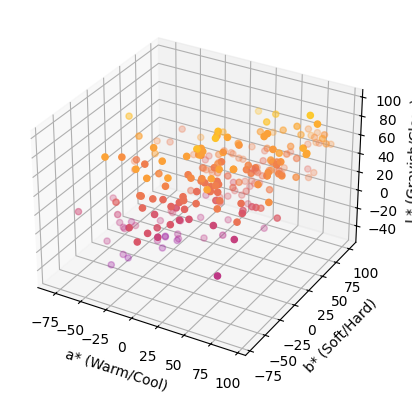

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage.color import rgb2lab

# Load the CSV file and drop unnecessary rows
df = pd.read_csv('emotions-RGB1-3.csv', encoding='utf-8')
emotions_to_drop = ['Proper', 'Aristocratic','Formal','Cultivated', 'Delicious', 'Happy', 'Active', 'Fiery', 'Forceful', 'Hot', 'Aromatic', 'Dapper', 'Precious', 'Light', 'Neat', 'Cultivated']
df = df[~df['Emotional_Word'].isin(emotions_to_drop)]

# Normalize RGB values
def normalize_rgb(rgb_values):
    if pd.isna(rgb_values):
        return np.nan
    rgb_values = list(map(int, rgb_values.strip('[]').split(',')))
    return [value / 255.0 for value in rgb_values]

for i in range(1, 4):
    df[f'RGB_{i}'] = df[f'RGB_{i}'].apply(normalize_rgb)

# Convert normalized RGB to CIELAB
def rgb_to_lab(rgb_values):
    if isinstance(rgb_values, float) and np.isnan(rgb_values):
        return np.nan
    return rgb2lab(np.array(rgb_values).reshape(1, 1, 3)).flatten()

for i in range(1, 4):
    df[f'LAB_{i}'] = df[f'RGB_{i}'].apply(rgb_to_lab)

# Keep only the updated columns
df_lab = df[['Emotional_Word'] + [f'LAB_{i}' for i in range(1, 4)]]

# Define function to calculate dimensions
def calculate_dimensions(lab_values):
    if isinstance(lab_values, float) and np.isnan(lab_values):
        return np.nan
    l, a, b = lab_values
    warm_cool = 'Warm' if a > 0 else 'Cool'
    soft_hard = 'Soft' if b < 50 else 'Hard'
    grayish_clear = 'Grayish' if l < 50 else 'Clear'
    return warm_cool, soft_hard, grayish_clear

# Apply the function to each LAB column and store results in new columns
for i in range(1, 4):
    df_lab.loc[:, f'Dimensions_{i}'] = df_lab[f'LAB_{i}'].apply(lambda x: calculate_dimensions(x) if not isinstance(x, float) or not np.isnan(x) else np.nan)

# Extract only the columns related to emotional words and dimensions
columns_to_keep = ['Emotional_Word'] + [f'Dimensions_{i}' for i in range(1, 4)]
df_dimensions = df_lab[columns_to_keep]

# Save the dataset for further analysis
df_dimensions.to_csv('emotions_dimensions.csv', index=False)

# Display the dataset
print(df_dimensions.head())

# 3D Plotting of CIELAB Values
from ast import literal_eval

# Extract LAB values for plotting
lab_values = df_lab[['LAB_1', 'LAB_2', 'LAB_3']].dropna().values

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot each LAB value in 3D space
for lab_set in lab_values:
    l, a, b = lab_set
    ax.scatter(a, b, l, color=plt.cm.plasma((l + 128) / 255))

ax.set_xlabel('a* (Warm/Cool)')
ax.set_ylabel('b* (Soft/Hard)')
ax.set_zlabel('L* (Grayish/Clear)')

plt.show()

### Machine Learning and Model Training
- ##### note : i need to check if it's better Random Forest or is it better SVM i must check it also with this version or to find and some other model 

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Prepare the dataset for machine learning
# Concatenate the LAB values directly
X = np.concatenate([df_lab['LAB_1'].tolist(), df_lab['LAB_2'].tolist(), df_lab['LAB_3'].tolist()], axis=1)

# Ensure that all elements in X are in the correct format
X = np.array([np.concatenate([np.array(lab1), np.array(lab2), np.array(lab3)]) 
              for lab1, lab2, lab3 in zip(df_lab['LAB_1'], df_lab['LAB_2'], df_lab['LAB_3'])])

y = df_lab['Emotional_Word']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Classification Report:
                          precision    recall  f1-score   support

               Abundant       0.00      0.00      0.00       0.0
                Amusing       0.00      0.00      0.00       1.0
          Authoritative       0.00      0.00      0.00       1.0
                   Bold       0.00      0.00      0.00       1.0
              Brilliant       0.00      0.00      0.00       1.0
                  Clean       0.00      0.00      0.00       0.0
        Clean and fresh       0.00      0.00      0.00       0.0
                  Clear       0.00      0.00      0.00       1.0
                   Cute       0.00      0.00      0.00       1.0
                Dynamic       0.00      0.00      0.00       0.0
                Eminent       0.00      0.00      0.00       1.0
              Enjoyable       0.00      0.00      0.00       1.0
             Flamboyant       0.00      0.00      0.00       1.0
               Friendly       0.00      0.00      0.00       0.0


c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMet

### Step 6: Validation and Refinement
#### Test this system with various images to see how well your emotional predictions match expected outcomes. Based on this testing, refine your RGB-to-emotion mappings and your dimension calculations.

### Step 7: Documentation and Sharing
#### Document your methods, findings, and how your tool can be used. Consider sharing your work as a research paper or an open-source project for feedback and contributions from the community.

#### This structured approach should help you effectively apply your dataset to a practical application, enhancing both the theoretical and practical understanding of color-emotion relationships.